# Problem Set 1 (Take Home) - 40 points

## PS 1.A - 20 points

In [this video](https://www.youtube.com/watch?v=ho6JXE3EbZ8) the author explains how to extract various visualizations of what CNNs learn. [Your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/cnn/cnn-example-architectures/visualizing-what-convnets-learn.html) also covers the topic.

Using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), train a ResNet-50 based CNN on the classification task of $K=9$ classes (filter out the class `ship`) and create the following visualizations for first, middle and last blocks of ResNet-50. You are free to select a class to showcase such visualizations.

* Visualizing intermediate convnet outputs (“intermediate activations”). This is useful to understand how successive convnet layers transform their input.

* Visualizing convnets filters. This is useful to understand precisely what visual pattern or concept each filter in a convnet is receptive to.

* Visualizing heatmaps of class activation in an image. This is useful to understand which part of an image where identified as belonging to a given class, and thus allows to localize objects in images.


In [151]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [152]:
#Loading CIFAR-10 dataset as part of Keras for the 2 parameters training and testing with images and labels
(shipDatasetTrainImages, shipDatasetTrainLabels), (shipDatasetTestImages, shipDatasetTestLabels) = keras.datasets.cifar10.load_data()

In [153]:
#Filtering out the ship class for creating visualizations for first, middle, and last blocks of ResNet-50
shipDatasetLabel = 8
allLabelsExceptShipTraining = np.where(shipDatasetTrainLabels != shipDatasetLabel)[0]
allLabelsExceptShipTesting = np.where(shipDatasetTestLabels != shipDatasetLabel)[0]
shipDatasetTrainImagesFiltered, shipDatasetTrainLabelsFiltered = shipDatasetTrainImages[allLabelsExceptShipTraining], shipDatasetTrainLabels[allLabelsExceptShipTraining]
shipDatasetTestingImagesFiltered, shipDatasetTestingLabelsFiltered = shipDatasetTestImages[allLabelsExceptShipTesting], shipDatasetTestLabels[allLabelsExceptShipTesting]

In [154]:
shipDatasetTrainImagesFiltered, shipDatasetTrainLabelsFiltered = shipDatasetTrainImagesFiltered[:600], shipDatasetTrainLabelsFiltered[:600]
shipDatasetTestingImagesFiltered, shipDatasetTestingLabelsFiltered = shipDatasetTestingImagesFiltered[:100], shipDatasetTestingLabelsFiltered[:100]

In [155]:
#Resizing the image to 224 pixels by 224 pixels as per ResNet-50 architecture model for the training images and testing images filtered
shipDatasetTrainImagesFiltered = tf.image.resize(shipDatasetTrainImagesFiltered, (224, 224))
shipDatasetTestingImagesFiltered = tf.image.resize(shipDatasetTestingImagesFiltered, (224, 224))

In [156]:
shipDatasetFilteredImages = keras.applications.resnet50.ResNet50(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))
shipDatasetValue = shipDatasetFilteredImages.output
shipDatasetValue = tf.keras.layers.GlobalAveragePooling2D()(shipDatasetValue)
shipDatasetValue = tf.keras.layers.Dense(1024, activation = 'relu')(shipDatasetValue)
shipDatasetPredictions = tf.keras.layers.Dense(9, activation = 'softmax')(shipDatasetValue)
shipDatasetModelValue = tf.keras.models.Model(inputs = shipDatasetFilteredImages.input, outputs = shipDatasetPredictions)
shipDatasetModelValue.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_24 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_24[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [157]:
shipDatasetModelValue.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [158]:
shipDatasetTrainingDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()
shipDatasetTrainingGenerator = shipDatasetTrainingDataGenerator.flow(shipDatasetTrainImagesFiltered, shipDatasetTrainLabelsFiltered, batch_size = 20)
shipDatasetTestingDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator()
shipDatasetTestingGenerator = shipDatasetTestingDataGenerator.flow(shipDatasetTestingImagesFiltered, shipDatasetTestingLabelsFiltered, batch_size = 20)

In [ ]:
shipDatasetModelValue.fit(shipDatasetTrainingGenerator, validation_data = shipDatasetTestingGenerator, epochs = 20)

Epoch 1/20
30/30 [==============================] - 456s 14s/step - loss: 1391.6332 - accuracy: 0.0183 - val_loss: 54878.9844 - val_accuracy: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 431s 14s/step - loss: 6597.8311 - accuracy: 0.0017 - val_loss: 281426.2500 - val_accuracy: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 429s 14s/step - loss: 13332.5938 - accuracy: 0.2033 - val_loss: 62172.8516 - val_accuracy: 1.0000
Epoch 4/20
30/30 [==============================] - 428s 14s/step - loss: 20436.2012 - accuracy: 0.3050 - val_loss: 799.9146 - val_accuracy: 0.9800
Epoch 5/20
30/30 [==============================] - 432s 14s/step - loss: 24417.4062 - accuracy: 0.2450 - val_loss: 12220.9570 - val_accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 435s 15s/step - loss: 28254.9297 - accuracy: 0.1683 - val_loss: 131972.7500 - val_accuracy: 0.0000e+00
Epoch 7/20
30/30 [==============================] - 430s 14s/step - loss: 36871.2148 - acc

In [159]:
shipClassIndex = 1
shipClassIndices = np.where(shipDatasetTrainLabelsFiltered == shipClassIndex)[0]
shipClassImage = shipDatasetTrainImagesFiltered[shipClassIndices[0]]

1/1 [==============================] - 2s 2s/step


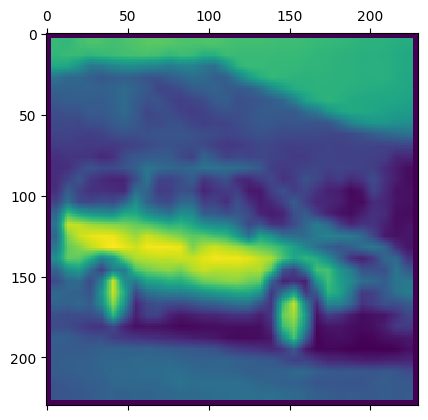

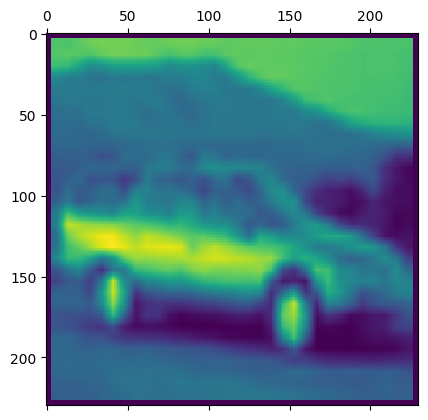

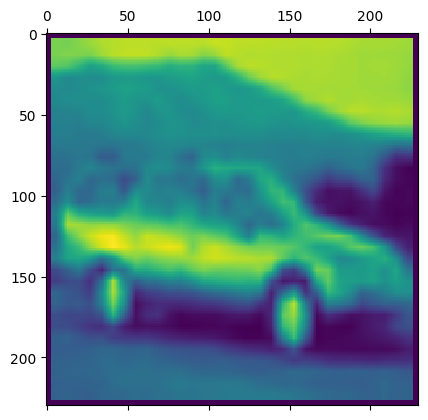

In [160]:
shipClassImage = tf.keras.preprocessing.image.img_to_array(shipClassImage)
shipClassImage = np.expand_dims(shipClassImage, axis = 0)

shipClassLayerOutputs = [shipClassLayer.output for shipClassLayer in shipDatasetModelValue.layers if 'conv' in shipClassLayer.name]
shipClassIntermediateLayerModel = keras.Model(inputs = shipDatasetModelValue.input, outputs = shipClassLayerOutputs)

shipClassIntermediateOutputs = shipClassIntermediateLayerModel.predict(shipClassImage)

shipClassFirstLayerOutput = shipClassIntermediateOutputs[0]
for w in range(shipClassFirstLayerOutput.shape[-1]):
  plt.matshow(shipClassFirstLayerOutput[0, :, :, w], cmap = 'viridis')
  plt.show()

## PS 1.B - 20 points

In [this notebook](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/transfer-learning/transfer_learning_tutorial.html) we showcase _transfer learning_ using a pre-trained CNN model.

Perform the fine-tunning and feature extraction methods of transfer learning using the same model as in PS-1A, for the class `ship`.

Repeat the visualization of PS-1.A before and after  transfer learning and write a conclusive summary as to the relative value of the two methods.

In [161]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()

In [162]:
# Insert your code here
import os, re, time, json
import PIL.Image, PIL.ImageFont, PIL.ImageDraw
import tensorflow as tf
from keras.applications.resnet50 import ResNet50
import tensorflow_datasets as tfds

In [163]:
shipDatasetBatchSize = 18
shipDatasetClassesValue =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def shipDatasetShowImages(shipDatasetDigits, shipDatasetPredictions, shipDatasetLabels, shipDatasetTitle):

  numberElementsShipDataset = 10

  shipDatasetIndices = np.random.choice(len(shipDatasetPredictions), size=numberElementsShipDataset)
  shipDatasetNumberDigits = shipDatasetDigits[shipDatasetIndices]
  shipDatasetNumberPredictions = shipDatasetPredictions[shipDatasetIndices]
  shipDatasetNumberPredictions = shipDatasetNumberPredictions.reshape((numberElementsShipDataset,))
  shipDatasetNumberLabels = shipDatasetLabels[shipDatasetIndices]

  shipDatasetFigurePlot = plt.figure(figsize=(20, 4))
  plt.title(shipDatasetTitle)
  plt.yticks([])
  plt.xticks([])

  for w in range(10):
    shipDatasetAxes = shipDatasetFigurePlot.add_subplot(1, 10, w+1)
    shipDatasetClassIndex =  shipDatasetNumberPredictions[w]

    plt.xlabel(shipDatasetClassesValue[shipDatasetClassIndex])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(shipDatasetNumberDigits[w])

# utility to display training and validation curves
def shipDatasetPlottingCurves(shipDatasetMetricValue, shipDatasetTitle, shipDatasetYParameter=5):
  plt.title(shipDatasetTitle)
  plt.ylim(0,shipDatasetYParameter)
  plt.plot([shipDatasetMetricValue],color='blue',label=shipDatasetMetricValue)
  plt.plot(['val_' + shipDatasetMetricValue],color='green',label='val_' + shipDatasetMetricValue)

In [164]:
#Loading CIFAR-10 dataset as part of Keras for the 2 parameters training and testing with images and labels
(shipDatasetTrainImages, shipDatasetTrainLabels), (shipDatasetTestImages, shipDatasetTestLabels) = keras.datasets.cifar10.load_data()

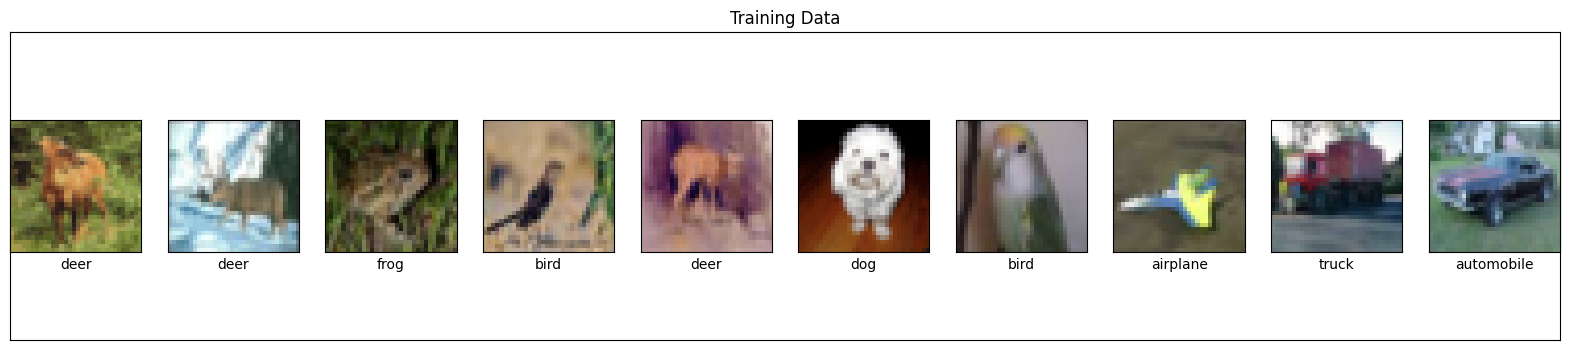

In [165]:
shipDatasetShowImages(shipDatasetTrainImages, shipDatasetTrainLabels, shipDatasetTrainLabels, "Training Data" )

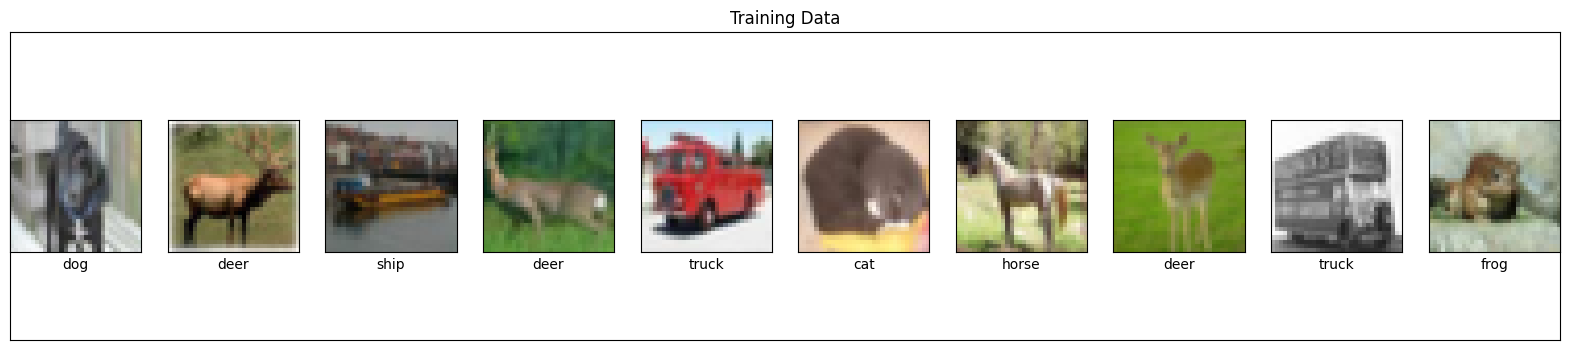

In [166]:
shipDatasetShowImages(shipDatasetTestImages, shipDatasetTestLabels, shipDatasetTestLabels, "Training Data" )

In [167]:
def shipDatasetPreprocessImageInput(shipDatasetInputImage):
  shipDatasetInputImage = shipDatasetInputImage.astype('float32')
  shipDatasetOutputImages = tf.keras.applications.resnet50.preprocess_input(shipDatasetInputImage)
  return shipDatasetOutputImages

In [168]:
shipDatasetTrainingParameter = shipDatasetPreprocessImageInput(shipDatasetTrainImages)
shipDatasetValidationParameter = shipDatasetPreprocessImageInput(shipDatasetTestImages)

In [169]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights.
Input size is 224 x 224.
'''
def shipDatasetFeatureExtractor(shipDatasetInputs):

  shipDatasetFeatureExtractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(shipDatasetInputs)
  return shipDatasetFeatureExtractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def shipDatasetClassifier(shipDatasetInputs):
    shipDatasetValue = tf.keras.layers.GlobalAveragePooling2D()(shipDatasetInputs)
    shipDatasetValue = tf.keras.layers.Flatten()(shipDatasetValue)
    shipDatasetValue = tf.keras.layers.Dense(1024, activation="relu")(shipDatasetValue)
    shipDatasetValue = tf.keras.layers.Dense(512, activation="relu")(shipDatasetValue)
    shipDatasetValue = tf.keras.layers.Dense(10, activation="softmax", name="classification")(shipDatasetValue)
    return shipDatasetValue

'''
Since input image size is (32 x 32), first upsample the image by factor of (7x7) to transform it to (224 x 224)
Connect the feature extraction and "classifier" layers to build the model.
'''
def shipDatasetFinalValue(shipDatasetInputs):

  shipDatasetResizedImage = tf.keras.layers.UpSampling2D(size=(7,7))(shipDatasetInputs)

  shipDatasetFeatureExtractorResNet = shipDatasetFeatureExtractor(shipDatasetResizedImage)
  shipDatasetClassificationOutput = shipDatasetClassifier(shipDatasetFeatureExtractorResNet)

  return shipDatasetClassificationOutput

'''
Define the model and compile it.
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def shipDatasetCompileModel():
  shipDatasetInputs = tf.keras.layers.Input(shape=(32,32,3))

  shipDatasetClassificationOutput = shipDatasetFinalValue(shipDatasetInputs)
  shipDatasetModelValue = tf.keras.Model(inputs=shipDatasetInputs, outputs=shipDatasetClassificationOutput)

  shipDatasetModelValue.compile(optimizer='SGD',
                  loss='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

  return shipDatasetModelValue


shipDatasetModelValue = shipDatasetCompileModel()

shipDatasetModelValue.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d_4 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_7  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              209

In [170]:
shipDatasetModelFeature = models.resnet50(pretrained=True)
num_ftrs = shipDatasetModelFeature.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
shipDatasetModelFeature.fc = nn.Linear(num_ftrs, 2)

shipDatasetCriterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
shipDatasetOptimizerFeature = optim.SGD(shipDatasetModelFeature.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
shipDatasetExpressLearningScheduler = lr_scheduler.StepLR(shipDatasetOptimizerFeature, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [171]:
from keras.applications import resnet
from keras.layers import *
from keras.models import Model,Sequential
from keras import optimizers
from keras import regularizers
import sklearn
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [172]:
import zipfile
import glob

shipDatasetZipFile = glob.glob('/content/cifar-10-python.tar.zip')
print(shipDatasetZipFile)

#extract file into a temp folder
def shipDatasetFileExtraction(shipDatasetFile):
    with zipfile.ZipFile(shipDatasetFile,"r") as shipDatasetZipReference:
        shipDatasetZipReference.extractall("cifar10Value")

#extract both train and test1 zip
for shipDatasetFiles in shipDatasetZipFile:
    shipDatasetFileExtraction(shipDatasetFiles)

['/content/cifar-10-python.tar.zip']


In [178]:
def shipDatasetGenerateLabel(shipDatasetDirectory):
    shipLabelValue = []
    for shipFileValue  in os.listdir(shipDatasetDirectory):
        if (shipFileValue.split('.')[0] == 'ship'):
            shipLabelValue.append(str(1))
    return shipLabelValue

def shipDatasetPathValue(shipDatasetDirectory):
    shipDatasetPath = []
    for shipDatasetFiles in os.listdir(shipDatasetDirectory):
        shipDatasetPath.append(shipDatasetFiles)
    return shipDatasetPath

shipDatasetTrainLabels = shipDatasetGenerateLabel('/content/cifar10Value')
shipDatasetTrainImages = shipDatasetPathValue('/content/cifar10Value')
shipDatasetTestImages = shipDatasetPathValue('/content/cifar10Value')

In [179]:
shipDatasetDataFrame = pd.DataFrame({'/content/sample_data': shipDatasetTrainImages})
print(shipDatasetDataFrame.head())

     /content/sample_data
0  cifar-10-python.tar.gz


In [180]:
shipDatasetTrainDataFrame = train_test_split(shipDatasetDataFrame, test_size=0.10)
shipDatasetTestingDataFrame = train_test_split(shipDatasetDataFrame, test_size = 0.10)
print(shipDatasetTrainDataFrame.shape)
print(shipDatasetTestingDataFrame.shape)

ValueError: ignored

In [181]:
def shipDatasetTrainingBatchCreation(shipDatasetModelValue):

    if shipDatasetModelValue == 'resnet':      #use of resnet requires its specific preprocessing_function for better accuracy for augmentation
        print('resnet data')
        shipDatasetTrainingDataGenerator = ImageDataGenerator(
                    rotation_range=10,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    preprocessing_function = tf.keras.applications.resnet50.preprocess_input)

    else:
        shipDatasetTrainingDataGenerator = ImageDataGenerator(    #standard augmentation
                    rotation_range=10,
                    rescale=1./255,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1)
def shipDatasetTestingBatchCreation(shipDatasetModelValue):
    if shipDatasetModelValue == 'resnet':
        print('resnet validation set')
        shipDatasetValidationDataGenerator = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet50.preprocess_input)

    return shipDatasetValidationDataGenerator


In [182]:
#Feature Extraction for ResNet50
resnet50TrainingShip = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

for renset50LayersShipDataset in resnet50TrainingShip.layers:
    renset50LayersShipDataset.trainable=False

print(resnet50TrainingShip.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 2048), dtype=tf.float32, name=None), name='conv5_block3_out/Relu:0', description="created by layer 'conv5_block3_out'")


In [183]:
shipDatasetFeatureList = []
for shipDatasetPath in shipDatasetTrainDataFrame['/content/sample_data'].to_numpy():
   shipDatasetValue = tf.keras.utils.load_img(shipDatasetPath,target_size=(shipDatasetImageSize,shipDatasetImageSize))
   shipDatasetImageArray = tf.keras.utils.img_to_array(shipDatasetValue)
   shipDatasetImageArray = np.expand_dims(shipDatasetImageArray, axis=0)
   shipDatasetFeatures = resnet50TrainingShip.predict(shipDatasetImageArray)
   shipDatasetFeatureList.append(shipDatasetFeatures)

shipDatasetFeatureValue = np.reshape(shipDatasetFeatureList,(-1,7*7*512))

NameError: ignored

In [184]:
#Logistic Regression - Ship Dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

shipDatasetValueOpposite = shipDatasetTrainDataFrame['category'].to_numpy()  #convert df to numpy array with shape(18750,)

shipDatasetTrainImages, shipDatasetTestImages, shipDatasetTrainLabels, shipDatasetTestLabels = train_test_split(shipDatasetFeatureValue, y, test_size=0.2, random_state=2020)

shipDatasetLogisticValue = LogisticRegression(C=0.1)
shipDatasetLogisticValue.fit(shipDatasetTrainImages,shipDatasetTrainLabels)

NameError: ignored

In [186]:
#Finetuning the convnet
np.random.seed(2020)

resnet50TrainingShip = resnet.ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

resnet50TrainingGenerator = shipDatasetTrainingBatchCreation('resnet')
resnet50TestingGenerator = shipDatasetTestingBatchCreation('resnet')


for renset50LayerShipDataset in resnet50TrainingShip.layers[:171]:
    renset50LayerShipDataset.trainable=False


shipDatasetFlattenConv = Flatten()(resnet50TrainingShip.output)   #Flatten the output layer from our Resnet model
shipDatasetDenseConv = Dense(1024,activation='relu')(shipDatasetFlattenConv)
shipDatasetDrop = Dropout(0.5)(shipDatasetDenseConv)
shipDatasetClassifier = Dense(1, activation='sigmoid')(shipDatasetDrop)


shipDatasetModelResNet50 = Model(resnet50TrainingShip.input, shipDatasetClassifier)
optimizer=optimizers.Adam(1e-5)


shipDatasetModelResNet50.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

shipDatasetModelResNet50.fit_generator(resnet50TrainingGenerator,
                    epochs=20,
                    validation_data=resnet50TestingGenerator,
                    validation_steps=resnet50TrainingGenerator.samples//16,
                    steps_per_epoch = resnet50TestingGenerator.samples//16)

resnet data
resnet validation set


AttributeError: ignored